# Function Transformer | Log Transform | Reciprocal Transform | Square Root Transform | Custom Transform

Feature Transformations
1. Mathematical Transformation
      1. function transformation
      2. power transformation
      3. Quantile transformation

# Your Data PDF (probability density function) that converted into Normal Distribution

# Basics of QQPlot

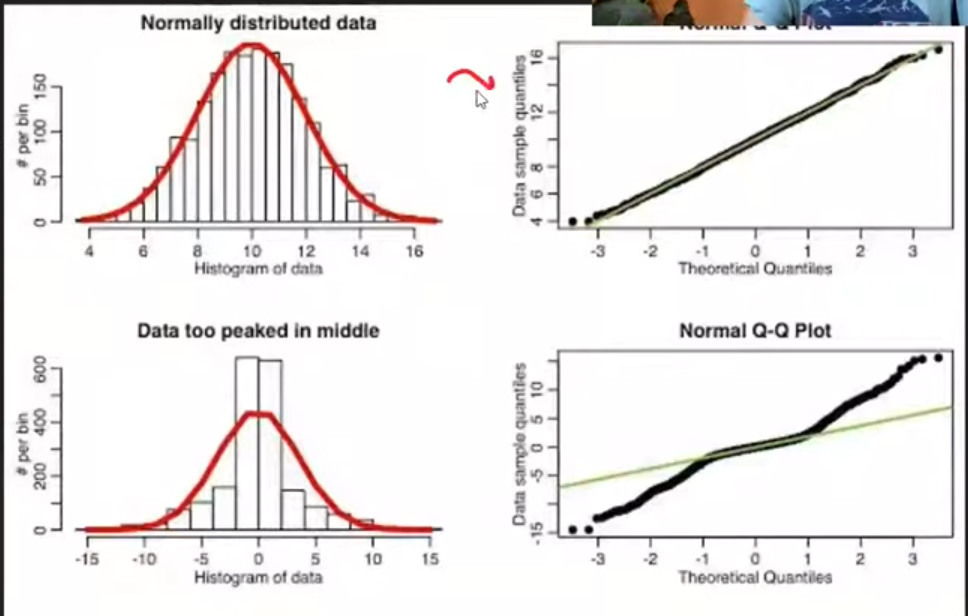

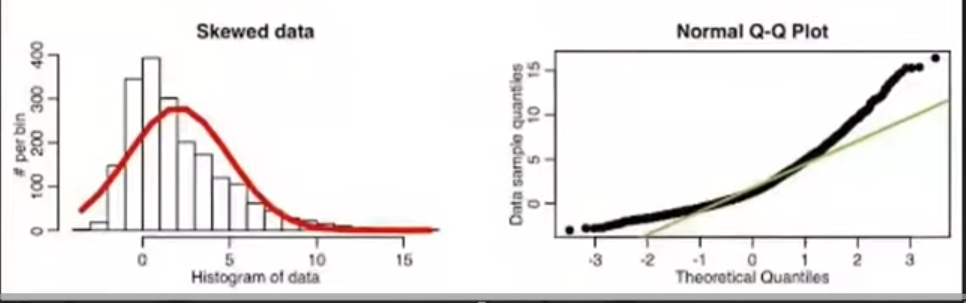

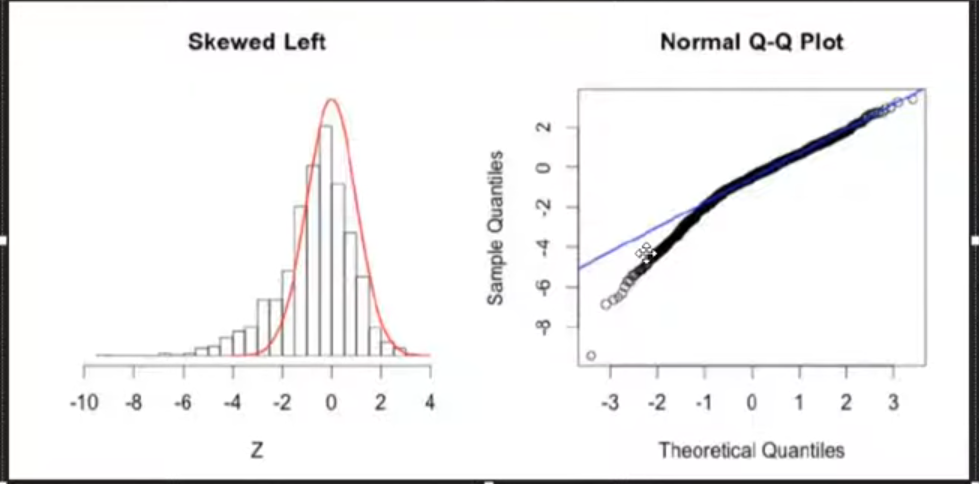

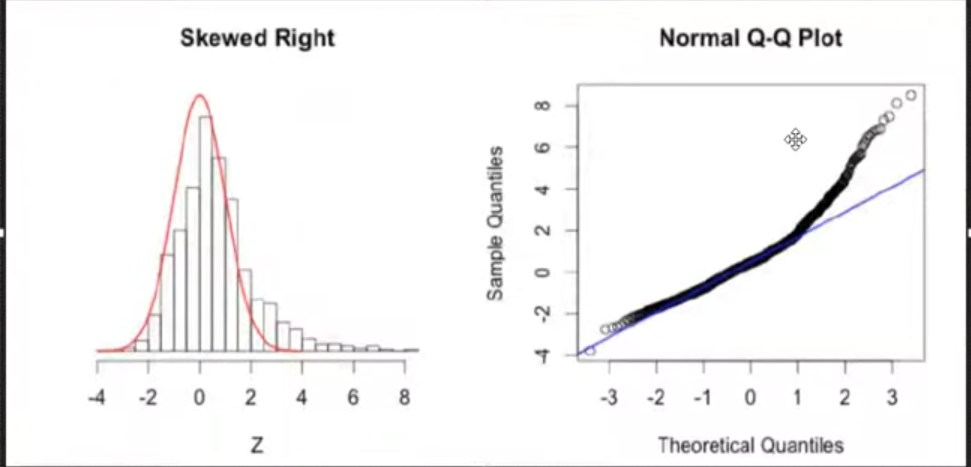

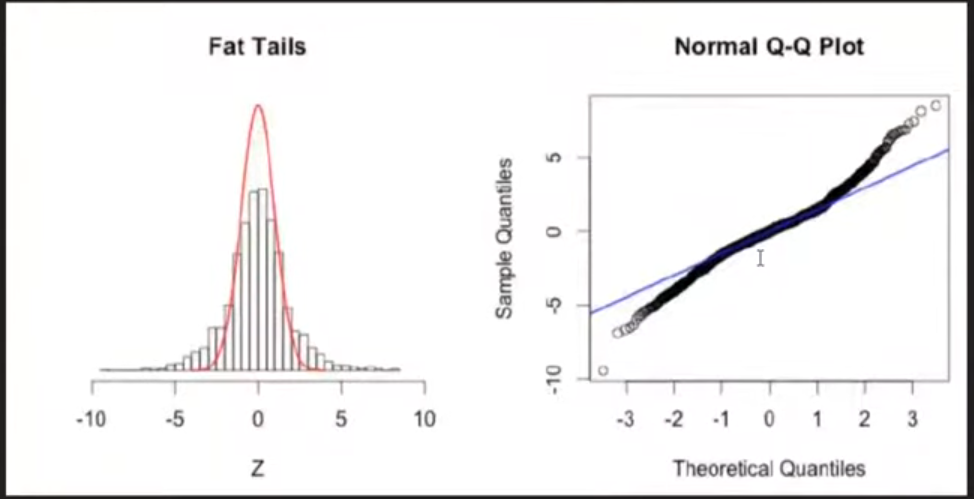

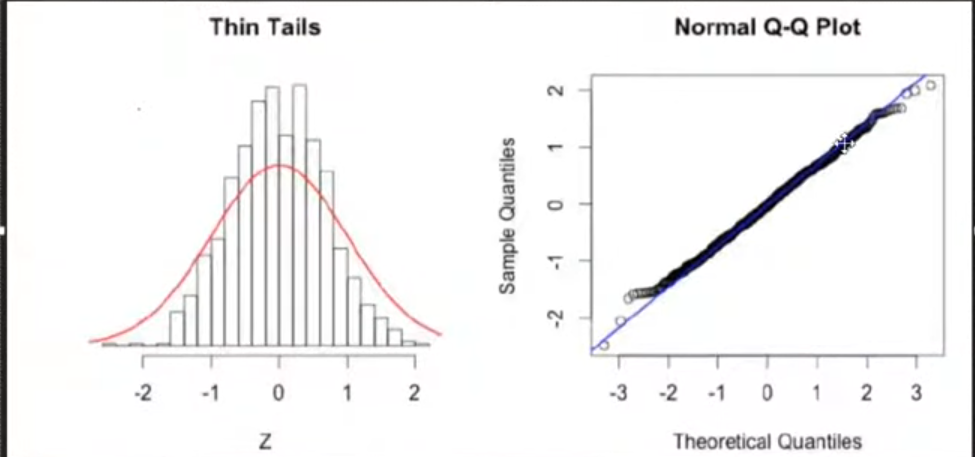

### How to find data is normal or not?
1. use distplot of sns
2. pd.skew() = 0
3. QQplot

# Log Transform
### Log transformation is a data processing technique where the logarithm of a variable's value is used instead of the original value.
taking log of the data to make it near or generaly become normally distributed

you acn not apply log on the negative values

advanatge if you have right skewed data to centerlize it


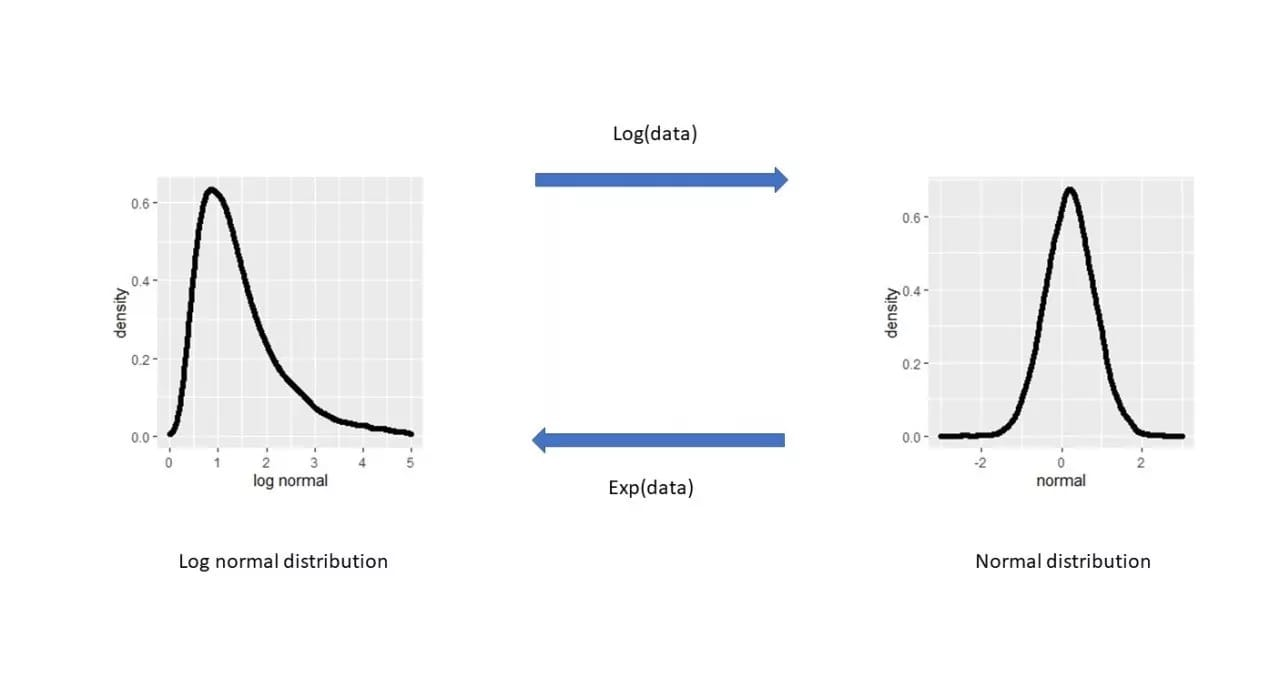

# Data Transformations in AI/ML

## 1. Reciprocal Transform (1/X)

*Definition:*  
Transforms each value x into 1/x.

*Purpose:*  
- Reduces the effect of very large values  
- Useful for highly right-skewed data  
- Helps reduce variance  

*When to Use:*  
- Data has large outliers  
- Strong right skew  

*Example:*  
| X | 1/X |
|---|-----|
| 2 | 0.5 |
| 5 | 0.2 |
| 10 | 0.1 |

*Note:* Cannot be applied when X contains 0.

---

## 2. Square Transform (X²)

*Definition:*  
Transforms each value x into x².

*Purpose:*  
- Increases variation  
- Spreads data apart  
- Useful when data is left-skewed  

*When to Use:*  
- When small values need more separation  
- For polynomial feature engineering  

*Example:*  
| X | X² |
|---|----|
| 1 | 1 |
| 2 | 4 |
| 3 | 9 |

---

## 3. Square Root Transform (√X)

*Definition:*  
Transforms each value x into sqrt(x).

*Purpose:*  
- Mildly reduces right-skew  
- Stabilizes variance  
- Softer than log transform  

*When to Use:*  
- Count data  
- When the dataset contains zeros  

*Example:*  
| X | √X |
|---|----|
| 4 | 2 |
| 9 | 3 |
| 16 | 4 |

---

## Summary Table

| Transformation | Formula | Effect | Best Use Case |
|----------------|---------|--------|----------------|
| Reciprocal | 1/x | Strongly reduces large values | Right-skew, outliers |
| Square | x^2 | Expands large values | Left-skew, polynomial features |
| Square Root | sqrt(x) | Mild skew reduction | Count data, zeros allowed |

In [ ]:
import pandas as pd
import numpy as np

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])

df['Age' ].fillna(df['Age'].mean(), inplace=True)

df.head()

/tmp/ipython-input-188800113.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age' ].fillna(df['Age'].mean(), inplace=True)


,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [ ]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [ ]:
df['Age'].fillna(df['Age'].mean(),inplace=True)

/tmp/ipython-input-694922604.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)


In [ ]:
x = df.iloc[ : , 1:3]
y = df.iloc[ :,0]

/tmp/ipython-input-1474609809.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


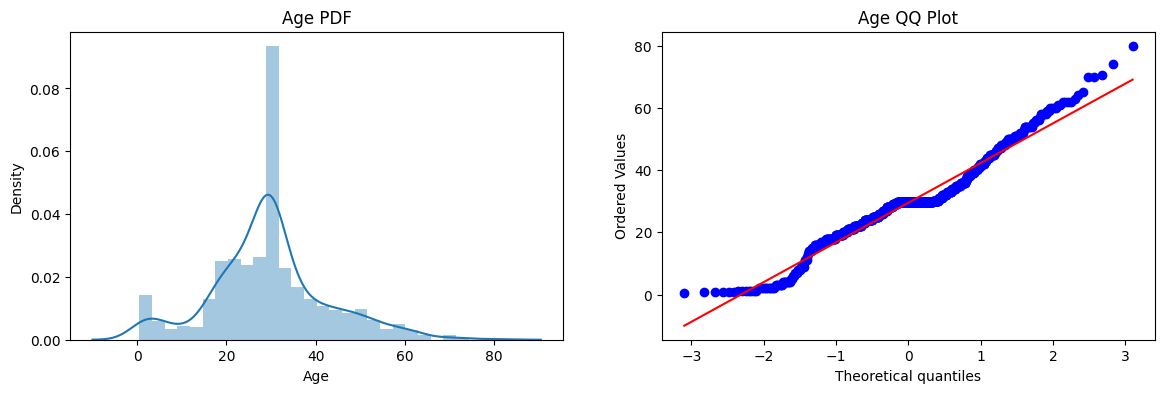

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state=42)

plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

/tmp/ipython-input-2981780686.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


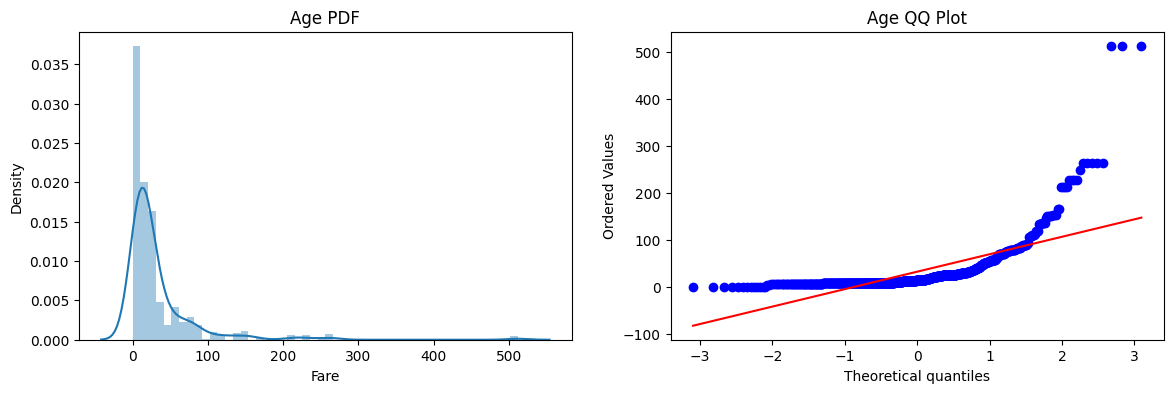

In [ ]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred = clf.predict(X_test)
y_pred1= clf2.predict(X_test)

print("Accuracy LR", accuracy_score(y_test,y_pred))
print("Accuracy DT", accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.659217877094972


In [ ]:
trf = FunctionTransformer(func=np.log1p)

X_train_transformed = trf.fit_transform(X_train)
X_test_transformed = trf.transform(X_test)

In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)

print("Accuracy LR", accuracy_score(y_test,y_pred))
print("Accuracy DT", accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6927374301675978


In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf, X_train_transformed, y_train, scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2, X_train_transformed, y_train, scoring='accuracy',cv=10)))

LR 0.6783646322378717
DT 0.6122652582159624


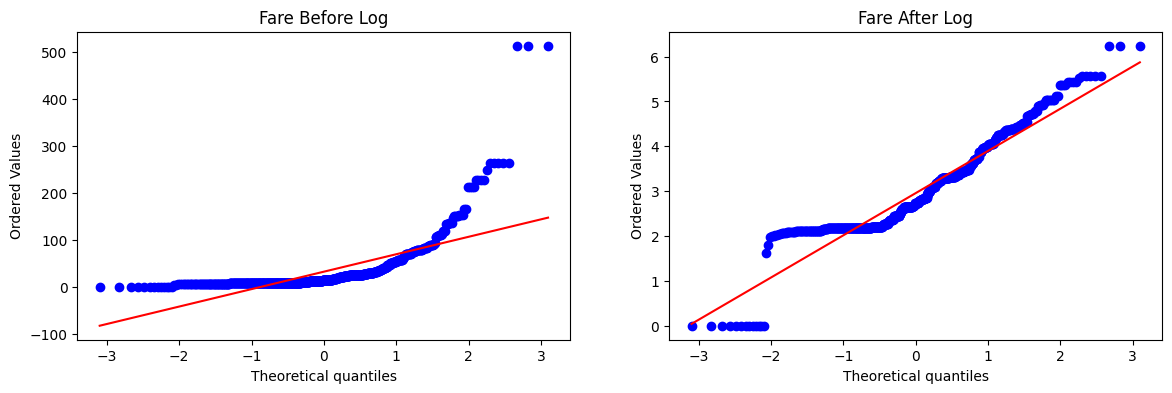

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

plt.show()

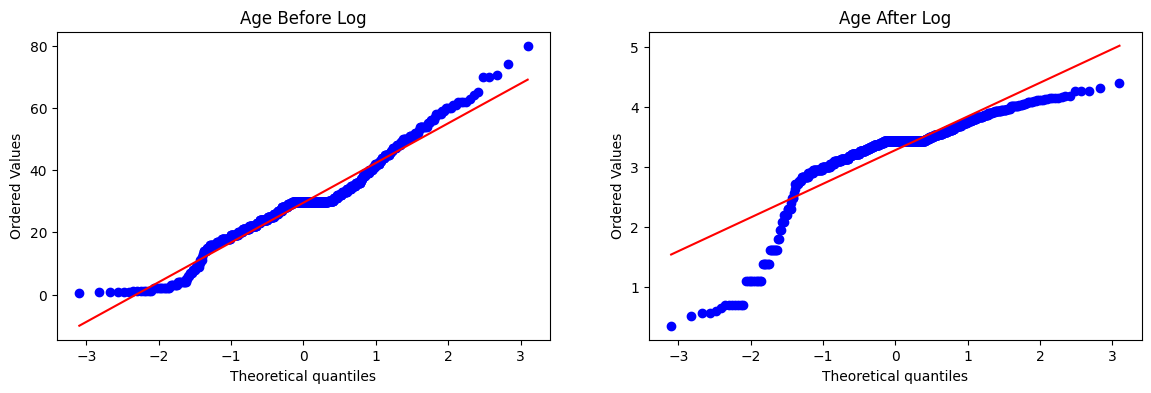

In [ ]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show()

In [ ]:
trf2 = ColumnTransformer([('log', FunctionTransformer(np.log1p), ['Fare'])], remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(X_train)
X_test_transformed2 = trf2.transform(X_test)


In [ ]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)

In [ ]:
print("Accuracy LR", accuracy_score(y_test,y_pred))
print("Accuracy DT", accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.659217877094972


In [ ]:
X_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf, X_transformed2,y, scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6644444444444444


In [ ]:
def apply_transform(transform):
    X = df.iloc[ :, 1:3]
    y = df.iloc[:,0]

    trf = ColumnTransformer([('log', FunctionTransformer(transform), ['Fare' ]) ], remainder='passthrough')

    X_trans = trf.fit_transform(X)

    clf = LogisticRegression()

    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform' )

    plt.show()

In [ ]:
apply_transform(lambda x: x**2)

In [ ]:
apply_transform(lambda x: x)

In [ ]:
apply_transform(lambda x: x**1/2)

In [ ]:
apply_transform(lambda x: 1/(x+0.1))